In [7]:
import numpy as np



In [13]:
z=([[ 0.,  1.,  2.],
               [ 3.,  4.,  5.],
               [ 6.,  7.,  8.]])
x=np.array(z)

# `x ** 2` squares each entry in the array `x`
x ** 2



array([[ 0.,  1.,  4.],
       [ 9., 16., 25.],
       [36., 49., 64.]])

In [14]:

# `np.sqrt(x)` takes the square-root
# of each entry in the array `x`
np.sqrt(x)



array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712]])

In [15]:


# Slices return arrays, thus you can operate
# on these too. Add .5 to each entry in row-0
# of `x`
.5 + x[0, :]

array([0.5, 1.5, 2.5])

In [16]:
np.sum(np.arange(10000))

49995000

In [17]:
total = 0
for i in np.arange(10000):
    total= i + total

In [18]:
total

49995000

In [19]:
from math import sin as sn
import matplotlib.pyplot as plt
import time

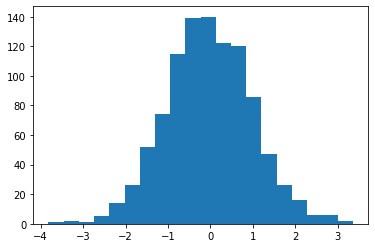

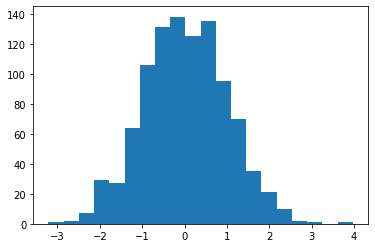


Time taken by the plain vanilla for-loop
----------------------------------------------
0.0 us

Time taken by list comprehension and zip
----------------------------------------
843 µs ± 22.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Time taken by map function
----------------------------------------
764 µs ± 36.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Time taken by numpy.vectorize method
----------------------------------------
462 µs ± 30.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
# Number of test points
N_point  = 1000
# Define a custom function with some if-else loops
def myfunc(x,y):
    if (x>0.5*y and y<0.3):
        return (sn(x-y))
    elif (x<0.5*y):
        return 0
    elif (x>0.2*y):
        return (2*sn(x+2*y))
    else:
        return (sn(y+x))
# List of stored elements, generated from a Normal distribution
lst_x = np.random.randn(N_point)
lst_y = np.random.randn(N_point)
lst_result = []
# Optional plots of the data
plt.hist(lst_x,bins=20)
plt.show()
plt.hist(lst_y,bins=20)
plt.show()
# First, plain vanilla for-loop
t1=time.time()
for i in range(len(lst_x)):
    x = lst_x[i]
    y= lst_y[i]
    if (x>0.5*y and y<0.3):
        lst_result.append(sn(x-y))
    elif (x<0.5*y):
        lst_result.append(0)
    elif (x>0.2*y):
        lst_result.append(2*sn(x+2*y))
    else:
        lst_result.append(sn(y+x))
t2=time.time()
print("\nTime taken by the plain vanilla for-loop\n----------------------------------------------\n{} us".format(1000000*(t2-t1)))
# List comprehension
print("\nTime taken by list comprehension and zip\n"+'-'*40)
%timeit lst_result = [myfunc(x,y) for x,y in zip(lst_x,lst_y)]
# Map() function
print("\nTime taken by map function\n"+'-'*40)
%timeit list(map(myfunc,lst_x,lst_y))
# Numpy.vectorize method
print("\nTime taken by numpy.vectorize method\n"+'-'*40)
vectfunc = np.vectorize(myfunc,otypes=[np.float],cache=False)
%timeit list(vectfunc(lst_x,lst_y))